# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import os

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file="traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]
img_size=X_train.shape[1] 


# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

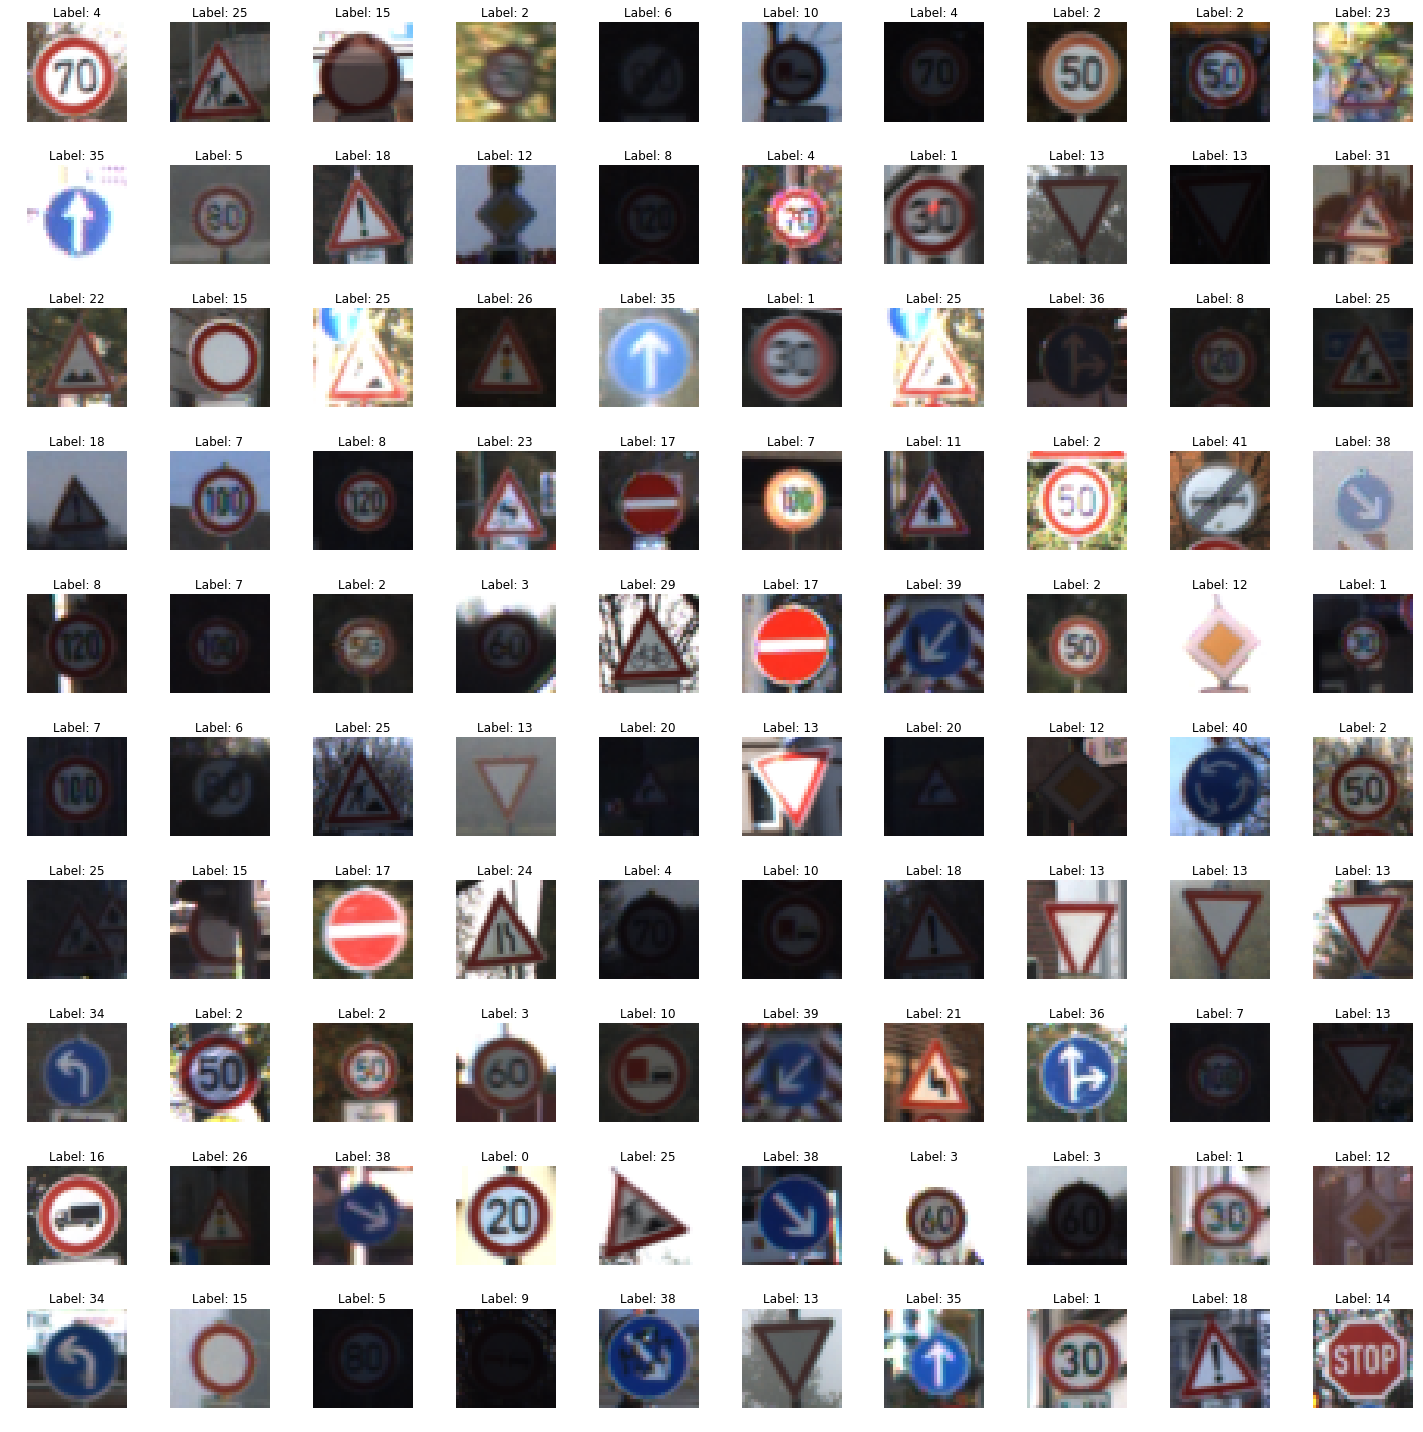

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

num_images = 100
indices = np.random.choice(list(range(n_train)), size=num_images, replace=False)

# Obtain the images and labels
images = X_train[indices]
labels = y_train[indices]

# Display the images
plt.figure(figsize=(20, 20))

for i, image in enumerate(images):
    plt.subplot(10, 10, i+1)
    plt.axis("off")
    plt.imshow(image)
    plt.title('Label: %d' % labels[i])
    
plt.tight_layout()
plt.show()

(array([  180.,  1980.,  2010.,  1260.,  1770.,  1650.,   360.,  1290.,
         1260.,  1320.,  1800.,  1170.,  1890.,  1920.,   690.,   540.,
          360.,   990.,  1080.,   180.,   300.,   270.,   330.,   450.,
          240.,  1350.,   540.,   210.,   480.,   240.,   390.,   690.,
          210.,   599.,   360.,  1080.,   330.,   180.,  1860.,   270.,
          300.,   210.,   210.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

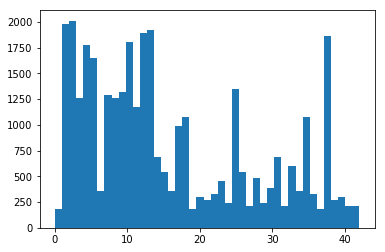

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.hist(y_train, bins = n_classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
#
# Image processing functions
# Functions in this cell are taken from https://github.com/NikolasEnt/Traffic-Sign-Classifier. 
# Nikolas used 26x26x3 images for training - mar=3 in crop_img function. 
# I am using 28x28x3 images for training - mar=2.
# Also I am not creating a copy of image inside the functions and manipulating the image X_train[n] itself
#

import cv2
  
def hist_img(img):
    img[:, :, 0] = cv2.equalizeHist(img[:, :, 0])
    img[:, :, 1] = cv2.equalizeHist(img[:, :, 1])
    img[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
    return img

def scale_img(img):
    sc_y=0.4*np.random.rand()+1.0
    img=cv2.resize(img, None, fx=1, fy=sc_y, interpolation = cv2.INTER_CUBIC)
    return img

def crop_img(img, mar=0):
    c_x,c_y, sh = int(img.shape[0]/2), int(img.shape[1]/2), int(img_size/2-mar)
    return img[(c_x-sh):(c_x+sh),(c_y-sh):(c_y+sh)]

def rotate_img(img):
    c_x,c_y = int(img.shape[0]/2), int(img.shape[1]/2)
    ang = 30.0*np.random.rand()-15
    Mat = cv2.getRotationMatrix2D((c_x, c_y), ang, 1.0)
    return cv2.warpAffine(img, Mat, img.shape[:2])

def sharpen_img(img):
    gb = cv2.GaussianBlur(img, (5,5), 20.0)
    return cv2.addWeighted(img, 2, gb, -1, 0)

# Compute linear image transformation ing*s+m
def lin_img(img,s=1.0,m=0.0):
    img=cv2.multiply(img, np.array([s]))
    return cv2.add(img, np.array([m]))

# Change image contrast; s>1 - increase
def contr_img(img, s=1.0):
    m=127.0*(1.0-s)
    return lin_img(img, s, m)

def transform_img(img):
    #img=sharpen_img(img)
    img=crop_img(img,2)
    #img=contr_img(img, 1.5)
    return hist_img(img)

def augment_img(img):
    img=contr_img(img, 1.8*np.random.rand()+0.2)
    img=rotate_img(img)
    img=scale_img(img)
    return transform_img(img)

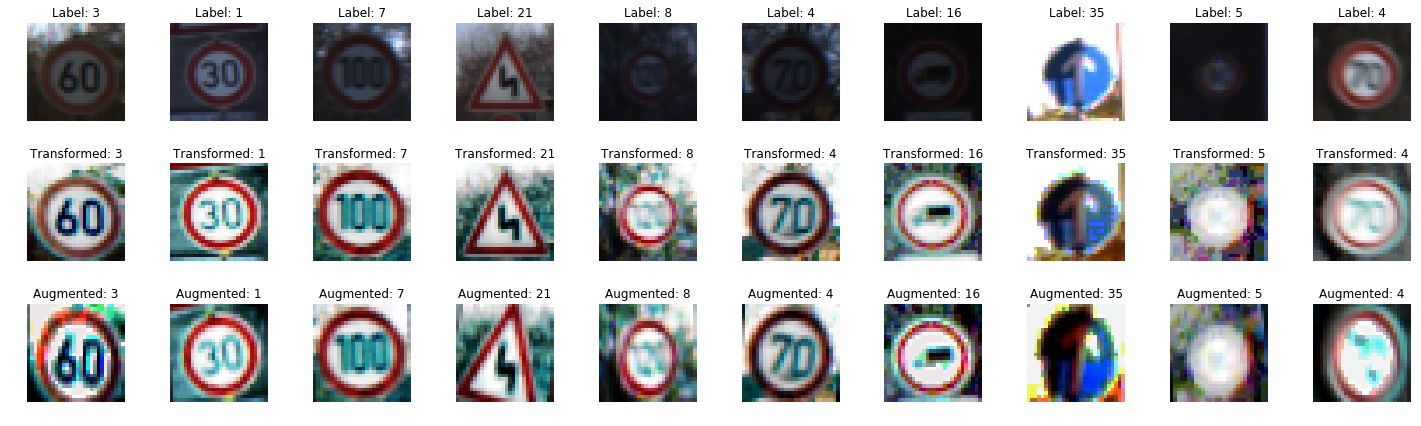

In [9]:
# Display the normalized images
plt.figure(figsize=(20, 6))

num_images = 10
indices = np.random.choice(list(range(n_train)), size=num_images, replace=False)

# Obtain the images and labels
images = X_train[indices]
labels = y_train[indices]

for i, image in enumerate(images):
    plt.subplot(3, num_images, i+1)
    plt.axis("off")
    plt.imshow(image)
    plt.title('Label: %d' % labels[i])
    plt.subplot(3, num_images, i+1+num_images)
    plt.axis("off")
    plt.imshow(transform_img(image))
    plt.title('Transformed: %d' % labels[i])
    plt.subplot(3, num_images, i+1+num_images*2)
    plt.axis("off")
    plt.imshow(augment_img(image))
    plt.title('Augmented: %d' % labels[i])
    
plt.tight_layout()
plt.show()

In [10]:
def augment_dataset(X_train, y_train, n=10):
    X_train_augmented = []
    y_train_augmented = []

    for i in range(X_train.shape[0]):
        img=X_train[i]
        #print ("i is {}".format(i))
        X_train_augmented.append(transform_img(img))
        y_train_augmented.append(y_train[i])
        #Generate n new images out of each input image
        for j in range(n):
            X_train_augmented.append(augment_img(img))
            y_train_augmented.append(y_train[i])
    return X_train_augmented, y_train_augmented


X_train_augmented, y_train_augmented = augment_dataset(X_train, y_train)
X_valid_augmented, y_valid_augmented = augment_dataset(X_valid, y_valid)

print("Total number of images in the augmented training set = ", len(X_train_augmented))
print("Total number of images in the augmented validation set = ", len(X_valid_augmented))

i is 0
i is 1
i is 2
i is 3
i is 4
i is 5
i is 6
i is 7
i is 8
i is 9
i is 10
i is 11
i is 12
i is 13
i is 14
i is 15
i is 16
i is 17
i is 18
i is 19
i is 20
i is 21
i is 22
i is 23
i is 24
i is 25
i is 26
i is 27
i is 28
i is 29
i is 30
i is 31
i is 32
i is 33
i is 34
i is 35
i is 36
i is 37
i is 38
i is 39
i is 40
i is 41
i is 42
i is 43
i is 44
i is 45
i is 46
i is 47
i is 48
i is 49
i is 50
i is 51
i is 52
i is 53
i is 54
i is 55
i is 56
i is 57
i is 58
i is 59
i is 60
i is 61
i is 62
i is 63
i is 64
i is 65
i is 66
i is 67
i is 68
i is 69
i is 70
i is 71
i is 72
i is 73
i is 74
i is 75
i is 76
i is 77
i is 78
i is 79
i is 80
i is 81
i is 82
i is 83
i is 84
i is 85
i is 86
i is 87
i is 88
i is 89
i is 90
i is 91
i is 92
i is 93
i is 94
i is 95
i is 96
i is 97
i is 98
i is 99
i is 100
i is 101
i is 102
i is 103
i is 104
i is 105
i is 106
i is 107
i is 108
i is 109
i is 110
i is 111
i is 112
i is 113
i is 114
i is 115
i is 116
i is 117
i is 118
i is 119
i is 120
i is 121
i is 122
i i

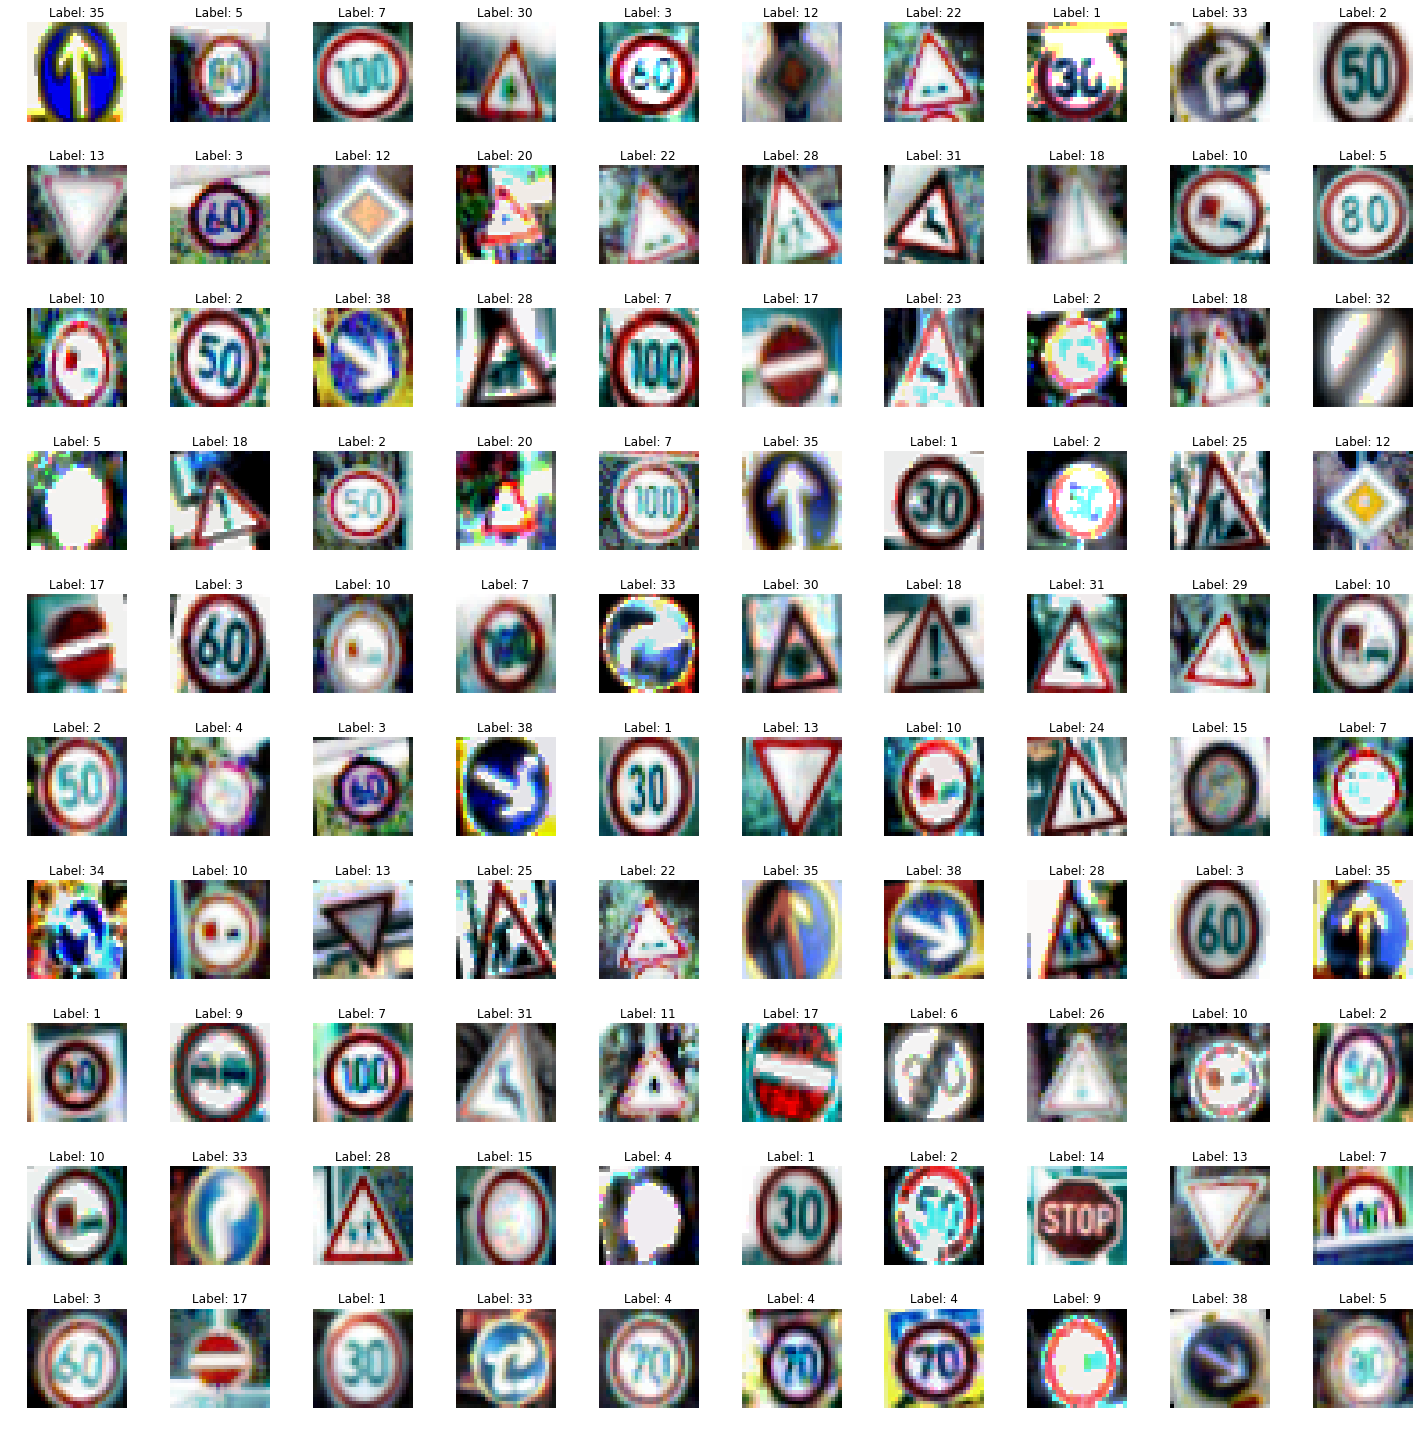

In [11]:
n_train_augmented = len(X_train_augmented)

num_images = 100
indices = np.random.choice(list(range(n_train_augmented)), size=num_images, replace=False)

# Obtain the images and labels
images = np.asarray(X_train_augmented)[indices]
labels = np.asarray(y_train_augmented)[indices]

# Display the images
plt.figure(figsize=(20, 20))

for i, image in enumerate(images):
    plt.subplot(10, 10, i+1)
    plt.axis("off")
    plt.imshow(image)
    plt.title('Label: %d' % labels[i])
    
plt.tight_layout()
plt.show()

### Model Architecture

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [13]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Hyperparameters
mu = 0
sigma = 0.1

rate = 0.0005
BATCH_SIZE = 128
EPOCHS = 25
 
def conv2d(x, W, b, strides, padding):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k, padding):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding=padding)

def LeNet(x):
    # parameters
    l1_convshape = 5
    l1_convdepth = 3
    l1_conv_count = 6
    l2_conv_shape = 5
    l2_conv_count = 16
    l2_conv_depth = l1_conv_count
    l3_out = 120
    l4_out = 84
    
    in_shape = 28
    l1_conv_out_shape = (in_shape - l1_convshape + 1)            #stride=1
    l1_pool_out_shape = l1_conv_out_shape/2                      #pooling=2x2
    l2_conv_out_shape = (l1_pool_out_shape - l2_conv_shape + 1)
    #print("l2_conv_out_shape ", l2_conv_out_shape)
    l2_pool_out_shape = l2_conv_out_shape/2
    #print("l2_pool_out_shape ", l2_pool_out_shape)
    l3_fc_in_shape = int(l2_pool_out_shape*l2_pool_out_shape*l2_conv_count)
    #print("l3_fc_in_shape ", l3_fc_in_shape)
    
    # Input = 28x28x3
    
    # Layer 1:
    # Convolutional Output 24x24x6
    # Pooling Output 12x12x6
    W1 = tf.Variable(tf.truncated_normal([l1_convshape, l1_convshape, l1_convdepth, l1_conv_count], 
                                         mean = mu, stddev = sigma), name='W1')
    b1 = tf.Variable(tf.zeros(l1_conv_count), name='b1')
    layer1 = conv2d(x, W1, b1, 1, 'VALID')
    pool1 = tf.nn.dropout(maxpool2d(layer1, 2, 'VALID'), keep_prob_conv)

    # Layer 2:
    # Convolutional Output 8x8x16
    # Pooling Output 4x4x16
    W2 = tf.Variable(tf.truncated_normal([l2_conv_shape, l2_conv_shape, l2_conv_depth, l2_conv_count], 
                                         mean = mu, stddev = sigma), name='W2')
    b2 = tf.Variable(tf.zeros(l2_conv_count), name='b2')
    layer2 = conv2d(pool1, W2, b2, 1, 'VALID')
    pool2 = tf.nn.dropout(maxpool2d(layer2, 2, 'VALID'), keep_prob_conv)
    
    # Layer 3:
    # Fully Connected Output l3out
    fc = flatten(pool2)
    W_fc1 = tf.Variable(tf.truncated_normal([l3_fc_in_shape, l3_out], mean = mu, stddev = sigma), name='W_fc1')
    b_fc1 = tf.Variable(tf.zeros(l3_out), name='b_fc1')
    fc1 = tf.nn.relu(tf.add(tf.matmul(fc, W_fc1), b_fc1))
    fc1_drop = tf.nn.dropout(fc1, keep_prob)

    # Layer 4
    # Fully Connected Output l4out
    W_fc2 = tf.Variable(tf.truncated_normal([l3_out, l4_out], mean = mu, stddev = sigma), name='W_fc2')
    b_fc2 = tf.Variable(tf.zeros(l4_out), name='b_fc2')
    fc2 = tf.nn.relu(tf.add(tf.matmul(fc1_drop, W_fc2), b_fc2))
    fc2_drop = tf.nn.dropout(fc2, keep_prob)
    

    # Layer 5
    # Fully Connected Output 43
    W_fc3 = tf.Variable(tf.truncated_normal([l4_out, 43], mean = mu, stddev = sigma), name='W_fc3')
    b_fc3 = tf.Variable(tf.zeros(43), name='b_fc3')
    logits = tf.add(tf.matmul(fc2_drop, W_fc3), b_fc3)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Variables
x = tf.placeholder(tf.float32, (None, 28, 28, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob_conv = tf.placeholder(tf.float32)
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

# Forward and backprop
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [15]:
# Accuracy
saver = tf.train.Saver()
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1, keep_prob_conv:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [16]:
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    #X_train_augmented, y_train_augmented = X_train, y_train
    num_examples = len(X_train_augmented)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        print("EPOCH " + str(i+1))
        X_train_augmented, y_train_augmented = shuffle(X_train_augmented, y_train_augmented)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_augmented[offset:end], y_train_augmented[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1, keep_prob_conv:1})    
            
        training_accuracy = evaluate(X_train_augmented, y_train_augmented)
        validation_accuracy = evaluate(X_valid_augmented, y_valid_augmented)
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './trafficsigns')
    print("Model saved")

Training...

EPOCH 1
Training Accuracy = 0.896
Validation Accuracy = 0.846

EPOCH 2
Training Accuracy = 0.937
Validation Accuracy = 0.887

EPOCH 3
Training Accuracy = 0.957
Validation Accuracy = 0.903

EPOCH 4
Training Accuracy = 0.963
Validation Accuracy = 0.912

EPOCH 5
Training Accuracy = 0.970
Validation Accuracy = 0.919

EPOCH 6
Training Accuracy = 0.972
Validation Accuracy = 0.924

EPOCH 7
Training Accuracy = 0.972
Validation Accuracy = 0.920

EPOCH 8
Training Accuracy = 0.969
Validation Accuracy = 0.918

EPOCH 9
Training Accuracy = 0.975
Validation Accuracy = 0.916

EPOCH 10
Training Accuracy = 0.979
Validation Accuracy = 0.926

EPOCH 11
Training Accuracy = 0.980
Validation Accuracy = 0.925

EPOCH 12
Training Accuracy = 0.982
Validation Accuracy = 0.924

EPOCH 13
Training Accuracy = 0.983
Validation Accuracy = 0.930

EPOCH 14
Training Accuracy = 0.983
Validation Accuracy = 0.932

EPOCH 15
Training Accuracy = 0.982
Validation Accuracy = 0.921

EPOCH 16
Training Accuracy = 0.981
V

In [17]:
# Transform test images prior to evaluating
X_test_augmented=[]
for i in range(n_test):
    img=X_test[i]
    X_test_augmented.append(transform_img(img))

In [18]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_augmented, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.927


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

german-web-test-images/30speed.jpg
Speed limit (30km/h)


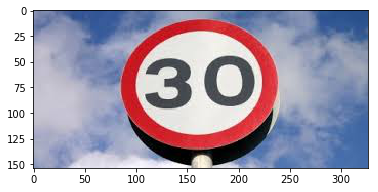

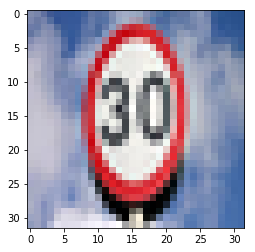

(32, 32, 3)


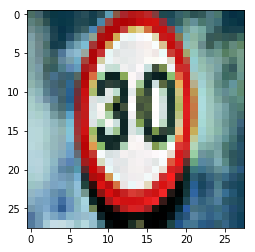

german-web-test-images/Caution.jpg
General caution


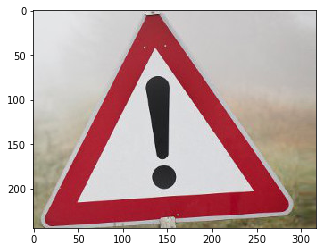

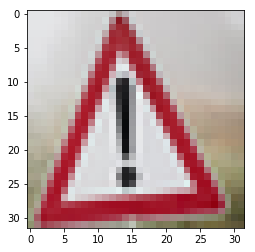

(32, 32, 3)


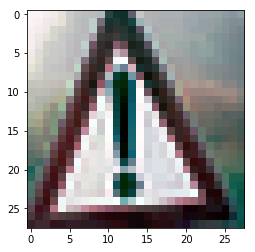

german-web-test-images/Do-Not-Enter.jpg
No entry


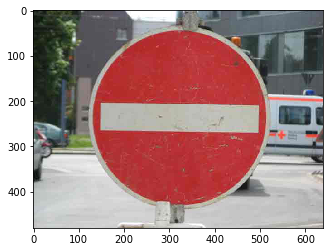

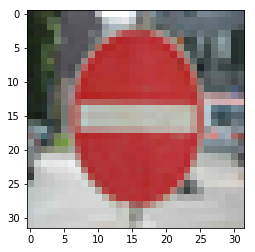

(32, 32, 3)


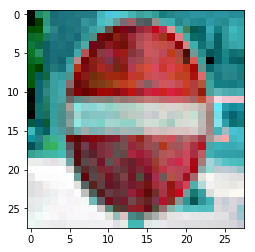

german-web-test-images/PriorityRoad.jpg
Priority road


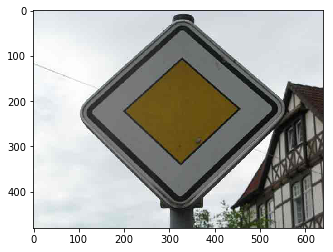

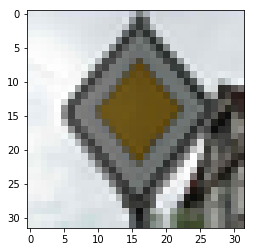

(32, 32, 3)


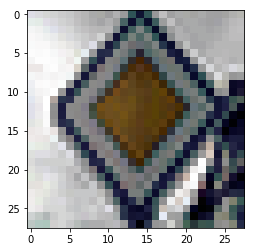

german-web-test-images/roadWorks-2.jpg
Road work


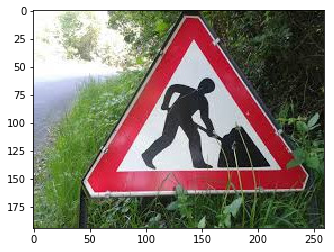

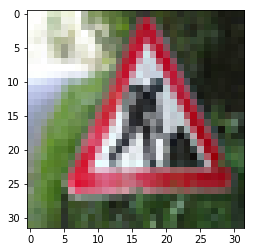

(32, 32, 3)


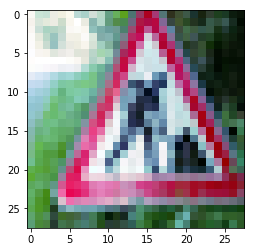

german-web-test-images/stop.jpg
Stop


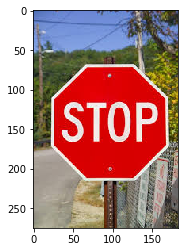

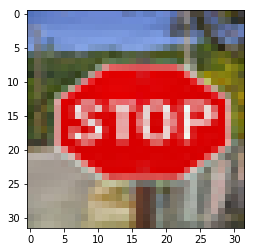

(32, 32, 3)


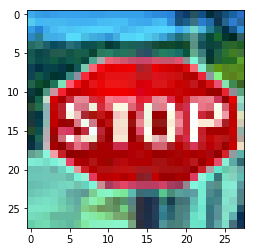

(6, 28, 28, 3)


In [176]:
# Code in the following cells is adapted from: https://github.com/peterbarry/udacity-self-driving-ND-traffic-sign-recognition/blob/master/Traffic_Sign_Classifier.ipynb


#Images loaded from http://finde-das-bild.de/bildersuche?keys=verkehrsschild based on comments in slack channle.

from PIL import Image

web_filedir = "german-web-test-images/"
web_test_images = ["30speed.jpg","Caution.jpg","Do-Not-Enter.jpg",
                 "PriorityRoad.jpg",
                 "roadWorks-2.jpg","stop.jpg"]


y_webtest_test = [1,18,17,12,25,14]

with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    sign_names = {rows[0]:rows[1] for rows in reader}

    
def process_images(images,y_test):
    x_int=0
    X_test=[]
    X_test_img=[]
    for image_name in images:
        print(web_filedir+image_name)
        print(sign_names[str(y_test[x_int])])
        x_int = x_int+1
        img = Image.open(web_filedir+image_name)
        X_test_img.append(img)
        imgplot = plt.imshow(img)
        plt.show()
        img = img.resize((32,32),Image.ANTIALIAS)
        img = np.array(img.getdata(),np.uint8).reshape(img.size[1], img.size[0], 3)
        imgplot = plt.imshow(img)
        plt.show()
        print(img.shape)
        img = transform_img(img)
        imgplot = plt.imshow(img)
        plt.show()

        X_test.append(img)

    X_test=np.array(X_test)
    y_test = np.array(y_test)
    
    return(X_test,y_test)
    

X_webtest_test,y_webtest_test = process_images(web_test_images,y_webtest_test)
print(X_webtest_test.shape)


In [177]:
print(X_webtest_test.shape, y_webtest_test.shape)

(6, 28, 28, 3) (6,)


In [178]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_webtest_test, y_webtest_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.500


### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [183]:
def get_prediction(img_list):
    
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))

        get_soft_max = tf.nn.softmax(logits)
        pred = sess.run(get_soft_max,feed_dict={x: img_list, keep_prob: 1., keep_prob_conv:1.})
        best_preds, best_indices = tf.nn.top_k(pred, k=5)
        best_preds, best_indices  = sess.run([best_preds, best_indices])
        print("Top Predictions\n{}".format(best_indices))

        return 


print(y_webtest_test)
get_prediction(X_webtest_test)

[ 1 18 17 12 25 14]
Top Predictions
[[10  5  7  9  1]
 [18 31 38  0  1]
 [17 14  0  1  2]
 [12  9 32 10 40]
 [ 4 18  1 20  2]
 [17 14  8  3 13]]


In [187]:
def get_prob_prediction(img_list):
   
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))

        get_soft_max = tf.nn.softmax(logits)
        pred = sess.run(get_soft_max,feed_dict={x:img_list, keep_prob:1., keep_prob_conv:1.})
        best_preds, best_indices = tf.nn.top_k(pred, k=5)
        best_preds, best_indices  = sess.run([best_preds, best_indices])
        print("Top Predictions {}".format(best_indices))
        print("Top Probabilites {}".format(best_preds))
        
        return [best_preds, best_indices]




[ 1 18 17 12 25 14]
Top Predictions [[10  5  7  9  1]
 [18 31 38  0  1]
 [17 14  0  1  2]
 [12  9 32 10 40]
 [ 4 18  1 20  2]
 [17 14  8  3 13]]
Top Probabilites [[  9.98813987e-01   1.17811037e-03   7.89814476e-06   4.11538856e-08
    1.28228210e-08]
 [  1.00000000e+00   1.64055824e-31   4.69142881e-32   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   4.39419625e-32   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   1.73755380e-31   2.65772190e-32   4.64738730e-36
    1.30627765e-37]
 [  9.98223841e-01   1.20255968e-03   3.46825691e-04   1.11701760e-04
    1.07698055e-04]
 [  1.00000000e+00   1.97235685e-16   7.63156859e-26   4.98850492e-29
    2.85317862e-33]]
Image name:30speed.jpg
Test Sign Type:Speed limit (30km/h)
Predicted sign type (highest prob):No passing for vehicles over 3.5 metric tons With Prob:0.998814
There were 1980 samples in the training set


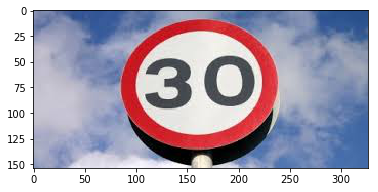

** INCORRECT  prediction
Image name:Caution.jpg
Test Sign Type:General caution
Predicted sign type (highest prob):General caution With Prob:1.0
There were 1080 samples in the training set


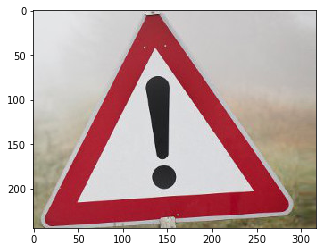

** Correct prediction
Image name:Do-Not-Enter.jpg
Test Sign Type:No entry
Predicted sign type (highest prob):No entry With Prob:1.0
There were 990 samples in the training set


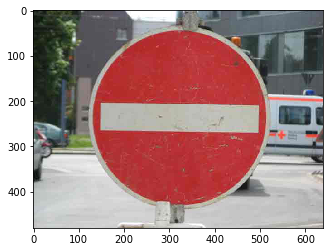

** Correct prediction
Image name:PriorityRoad.jpg
Test Sign Type:Priority road
Predicted sign type (highest prob):Priority road With Prob:1.0
There were 1890 samples in the training set


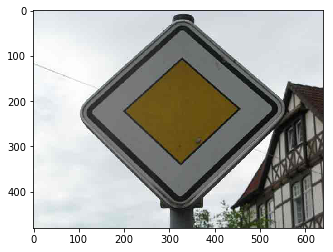

** Correct prediction
Image name:roadWorks-2.jpg
Test Sign Type:Road work
Predicted sign type (highest prob):Speed limit (70km/h) With Prob:0.998224
There were 1350 samples in the training set


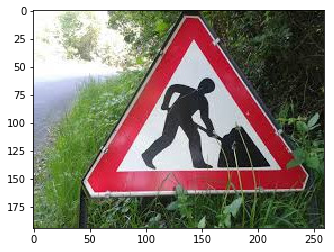

** INCORRECT  prediction
Image name:stop.jpg
Test Sign Type:Stop
Predicted sign type (highest prob):No entry With Prob:1.0
There were 690 samples in the training set


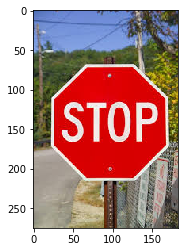

** INCORRECT  prediction


In [189]:
print(y_webtest_test)
[best_preds, best_indices] = get_prob_prediction(X_webtest_test)

x_iter = 0
for image in web_test_images:
    print ("Image name:" + image)
    image_name_label=sign_names[str(y_webtest_test[x_iter])]
    print ("Test Sign Type:"+image_name_label)
    predicted_sign_type = best_indices[x_iter][0]
    predicted_prob=best_preds[x_iter][0]
    
    print ("Predicted sign type (highest prob):"+sign_names[str(predicted_sign_type)]+" With Prob:"+str(predicted_prob))
    
    sign_type = y_webtest_test[x_iter]
    print("There were "+ str(np.count_nonzero(y_train == sign_type)) + " samples in the training set")

    img = Image.open(web_filedir+image)
    imgplot = plt.imshow(img)
    plt.show()
    
    if predicted_sign_type == sign_type:
        print("** Correct prediction")
    else:
        print("** INCORRECT  prediction")
    x_iter += 1   

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [190]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 